In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [2]:
import plotly.express as px

In [3]:
# pip install plotly==4.10.0

In [4]:
perfomances_dt5 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt5.rds")[None] # also works for RData
perfomances_dt5

,policy,NRT,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
0,ratio_5,static,12673.739051,42.451743,187.175828,1643.300388,0.000000,0.0,1643.300388,0.000000,5.0,ratio
1,ratio_5,dynamic,12629.274130,40.120596,177.216585,1644.046769,0.000000,-5.5,1644.046769,-0.746381,5.0,ratio
2,ratio_5,rfranger,12627.524282,40.001846,176.847971,1644.059820,0.000000,-5.8,1644.059820,-0.759432,5.0,ratio
3,ratio_5,expost,12759.391752,37.721004,173.342393,1664.975170,0.000000,-11.1,1664.975170,-21.674783,5.0,ratio
4,ratio_6,static,12619.606850,39.874544,177.681350,1617.492625,24.875389,-6.1,1642.368014,0.932374,6.0,ratio
...,...,...,...,...,...,...,...,...,...,...,...,...
269,lag_45,expost,12759.391752,37.721004,173.342393,1664.975170,0.000000,-11.1,1664.975170,-21.674783,45.0,lag
270,lag_50,static,12211.042376,32.365166,144.201397,1608.604955,0.000000,-23.8,1608.604955,34.695433,50.0,lag
271,lag_50,dynamic,12048.725520,30.545511,133.411398,1593.433595,0.000000,-28.0,1593.433595,49.866793,50.0,lag
272,lag_50,rfranger,12045.184449,30.521390,133.304437,1593.012717,0.000000,-28.1,1593.012717,50.287670,50.0,lag


In [5]:
plot_dt_long = pd.melt(perfomances_dt5, id_vars=['policy','policy_name','policy_val', 'NRT'], value_vars=['N_fert', 'Y_corn', 'L_change', 'P', 'G', 'net_balance'])
# plot_dt_long['policy_name'][plot_dt_long['policy_name'] == 'red'] = 'reduction'
plot_dt_long['policy_NRT'] = plot_dt_long['policy_name']+'_'+ plot_dt_long['NRT']
plot_dt_long

,policy,policy_name,policy_val,NRT,variable,value,policy_NRT
0,ratio_5,ratio,5.0,static,N_fert,187.175828,ratio_static
1,ratio_5,ratio,5.0,dynamic,N_fert,177.216585,ratio_dynamic
2,ratio_5,ratio,5.0,rfranger,N_fert,176.847971,ratio_rfranger
3,ratio_5,ratio,5.0,expost,N_fert,173.342393,ratio_expost
4,ratio_6,ratio,6.0,static,N_fert,177.681350,ratio_static
...,...,...,...,...,...,...,...
1639,lag_45,lag,45.0,expost,net_balance,1664.975170,lag_expost
1640,lag_50,lag,50.0,static,net_balance,1608.604955,lag_static
1641,lag_50,lag,50.0,dynamic,net_balance,1593.433595,lag_dynamic
1642,lag_50,lag,50.0,rfranger,net_balance,1593.012717,lag_rfranger


In [6]:
# Add a point at the 20% reduction
percent20_dt = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/percent20_dt.rds")[None] # also works for RData
percent20_dt = percent20_dt[['NRT','policy']]
percent20_dt
# #Filter the rows that are in the 20 percent
keys = list(percent20_dt.columns.values)
i1 = plot_dt_long.set_index(keys).index
i2 = percent20_dt.set_index(keys).index
plot_dt_points = plot_dt_long[i1.isin(i2)].reset_index()
plot_dt_points

,index,policy,policy_name,policy_val,NRT,variable,value,policy_NRT
0,21,ratio_10,ratio,10.0,dynamic,N_fert,152.446376,ratio_dynamic
1,22,ratio_10,ratio,10.0,rfranger,N_fert,152.109757,ratio_rfranger
2,23,ratio_10,ratio,10.0,expost,N_fert,150.304135,ratio_expost
3,36,ratio_14,ratio,14.0,static,N_fert,154.610320,ratio_static
4,65,leach_4,leach,4.0,dynamic,N_fert,156.329269,leach_dynamic
...,...,...,...,...,...,...,...,...
103,1560,red_5,red,5.0,rfranger,net_balance,1623.656994,red_rfranger
104,1562,red_6,red,6.0,static,net_balance,1614.847450,red_static
105,1613,lag_15,lag,15.0,dynamic,net_balance,1630.734691,lag_dynamic
106,1614,lag_15,lag,15.0,rfranger,net_balance,1630.662816,lag_rfranger


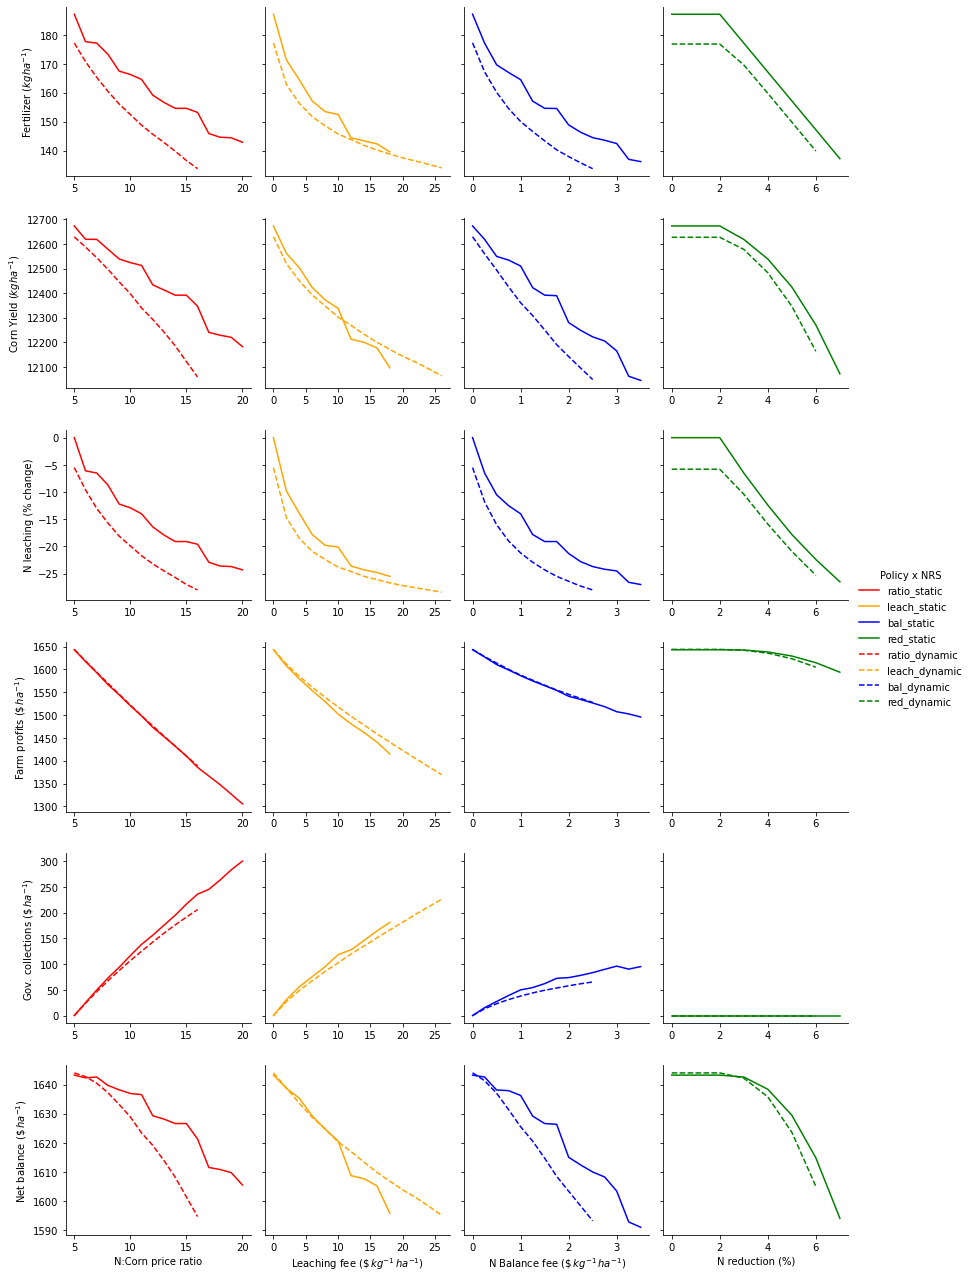

In [7]:
# importing packages 
import seaborn 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['green', 'green'], 'linestyle' : ["-","--"]}
kw = {'color': ['red', 'orange', 'blue', 'green','red', 'orange','blue','green'], 'linestyle' : ["-","-","-","-", "--","--","--", "--"]}

graph = seaborn.FacetGrid(plot_dt_long, row ='variable', col ='policy_name', hue ='policy_NRT', 
                          sharey = 'row', sharex = False, margin_titles=False, hue_kws=kw,
                          hue_order = ['ratio_static', 'leach_static', 'bal_static', 'red_static', 'ratio_dynamic', 'leach_dynamic', 'bal_dynamic', 'red_dynamic'],    
                          col_order = ['ratio', 'leach', 'bal', 'red'],
                          row_order = ['N_fert', 'Y_corn', 'L_change', 'P', 'G', 'net_balance']) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'Policy x NRS')  #, loc="lower center",bbox_to_anchor=(0.5, -0.3), ncol=2

graph.axes[5,0].set_xlabel('N:Corn price ratio')
graph.axes[5,1].set_xlabel(r'Leaching fee $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[5,2].set_xlabel(r'N Balance fee $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[5,3].set_xlabel('N reduction (%)')

graph.axes[0,0].set_ylabel(r'Fertilizer ($kg ha^{-1}$)')
graph.axes[1,0].set_ylabel(r'Corn Yield ($kg ha^{-1}$)')
graph.axes[2,0].set_ylabel('N leaching (% change)')
graph.axes[3,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)')
graph.axes[4,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)')
graph.axes[5,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)')

axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
    axes_n.tick_params(labelbottom=True)  
# show the object 

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.png"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')
  
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.pdf"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')    

In [8]:
# ONLY FOUR PANELS (SEMINAR)
list_of_values = ['L_change', 'P', 'G', 'net_balance']
plot_dt_long2 = plot_dt_long[plot_dt_long['variable'].isin(list_of_values)]


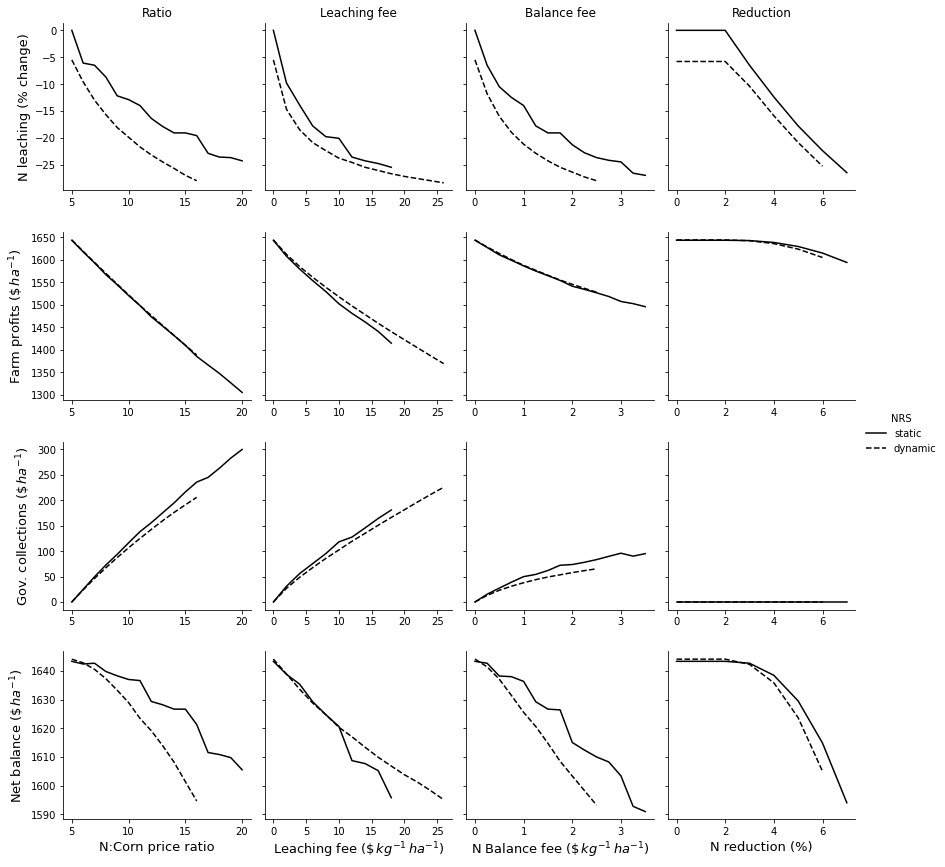

In [9]:

import seaborn 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['black', 'black'], 'linestyle' : ["-","--"]}
# kw = {'color': ['red', 'orange', 'blue', 'green','red', 'orange','blue','green'], 'linestyle' : ["-","-","-","-", "--","--","--", "--"]}

graph = seaborn.FacetGrid(plot_dt_long2, row ='variable', col ='policy_name', hue ='NRT', 
                          sharey = 'row', sharex = False, margin_titles=False, hue_kws=kw,
                          hue_order = ['static', 'dynamic'],    
                          col_order = ['ratio', 'leach', 'bal', 'red'],
                          row_order = ['L_change', 'P', 'G', 'net_balance']) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'NRS')  #, loc="lower center",bbox_to_anchor=(0.5, -0.3), ncol=2

graph.axes[3,0].set_xlabel('N:Corn price ratio',fontsize=13)
graph.axes[3,1].set_xlabel(r'Leaching fee $(\$ \/ kg^{-1}\/ ha^{-1})$',fontsize=13)
graph.axes[3,2].set_xlabel(r'N Balance fee $(\$ \/ kg^{-1}\/ ha^{-1})$',fontsize=13)
graph.axes[3,3].set_xlabel('N reduction (%)',fontsize=13)

# graph.axes[0,0].set_ylabel(r'Fertilizer ($kg ha^{-1}$)')
# graph.axes[1,0].set_ylabel(r'Corn Yield ($kg ha^{-1}$)')
graph.axes[0,0].set_ylabel('N leaching (% change)',fontsize=13)
graph.axes[1,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)',fontsize=13)
graph.axes[2,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)',fontsize=13)
graph.axes[3,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)',fontsize=13)


axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
    axes_n.tick_params(labelbottom=True)  
# show the object 

graph.axes[0,0].set_title("Ratio")
graph.axes[0,1].set_title("Leaching fee")
graph.axes[0,2].set_title("Balance fee")
graph.axes[0,3].set_title("Reduction")

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python_seminar.png"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')
  
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python_seminar.pdf"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')    

In [10]:
plot_dt_long2 = plot_dt_long[plot_dt_long['NRT'] == 'static']
plot_dt_long2

,policy,policy_name,policy_val,NRT,variable,value,policy_NRT
0,ratio_5,ratio,5.0,static,N_fert,187.175828,ratio_static
4,ratio_6,ratio,6.0,static,N_fert,177.681350,ratio_static
8,ratio_7,ratio,7.0,static,N_fert,177.175828,ratio_static
12,ratio_8,ratio,8.0,static,N_fert,173.321365,ratio_static
16,ratio_9,ratio,9.0,static,N_fert,167.504736,ratio_static
...,...,...,...,...,...,...,...
1624,lag_30,lag,30.0,static,net_balance,1620.353275,lag_static
1628,lag_35,lag,35.0,static,net_balance,1614.847450,lag_static
1632,lag_40,lag,40.0,static,net_balance,1611.546542,lag_static
1636,lag_45,lag,45.0,static,net_balance,1610.848635,lag_static


IndexError: list index out of range

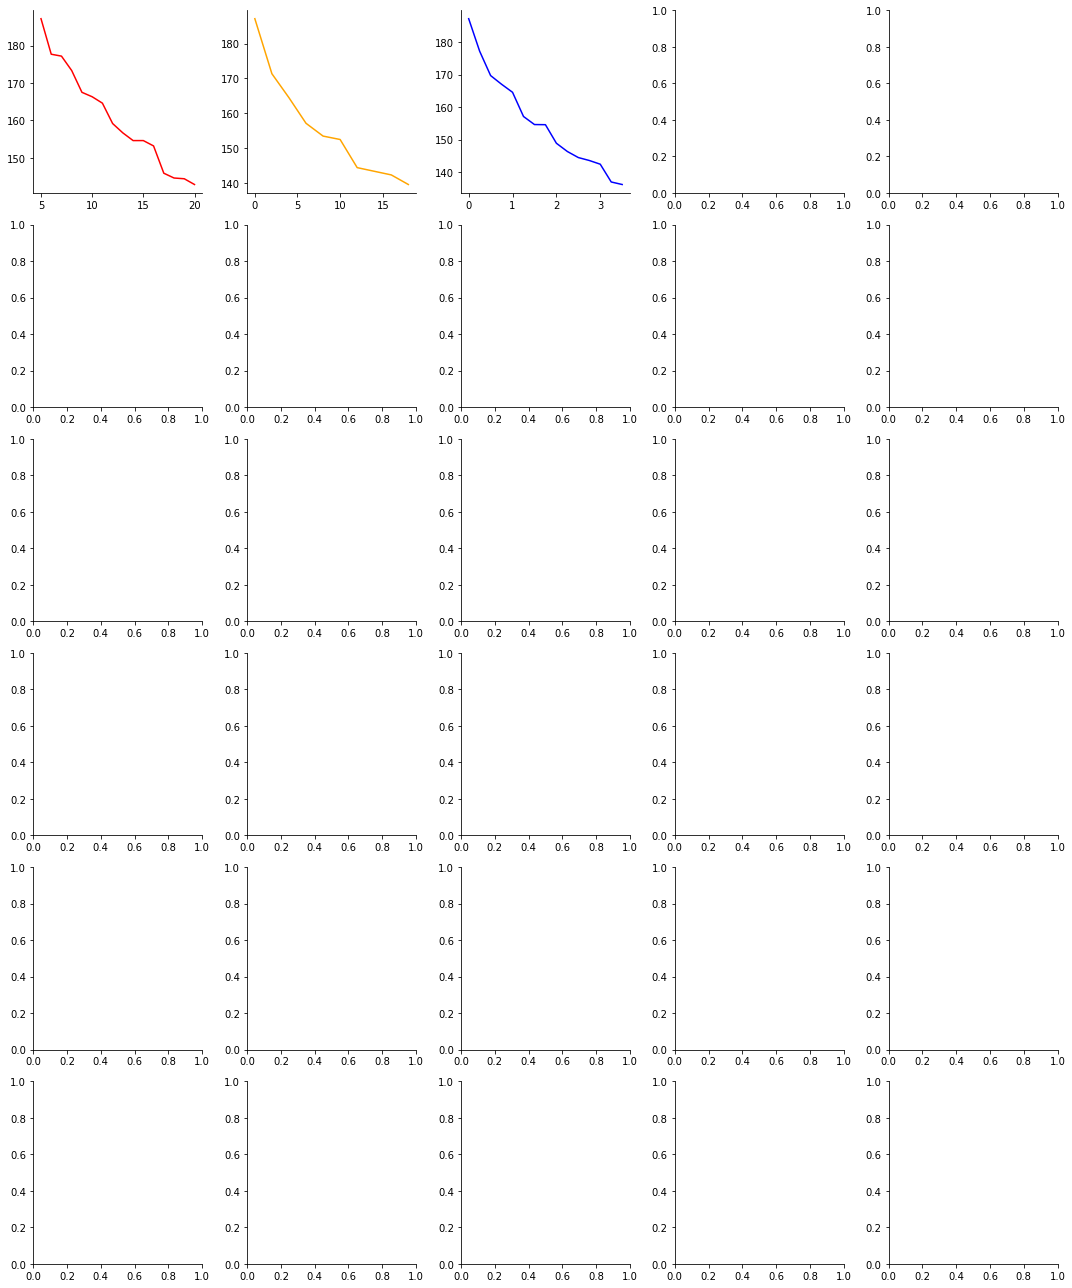

In [11]:
# No DYNAMIC 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['red', 'orange', 'blue']}
graph = seaborn.FacetGrid(plot_dt_long2, row ='variable', col ='policy_name', hue = 'policy_name',sharey = False, sharex = False, margin_titles=False, hue_kws=kw) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'Policy') 
#graph.legend.texts[0].set_text("Whatever else")
graph.axes[3,0].set_xlabel('N:Corn price ratio')
graph.axes[3,1].set_xlabel(r'Fee on leaching $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[3,2].set_xlabel('N reduction (%)')

graph.axes[0,0].set_ylabel('N leaching (% change)')
graph.axes[1,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)')
graph.axes[2,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)')
graph.axes[3,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)')

axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
# show the object 
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.pdf"

graph.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.png"

graph.savefig(plot_file_name, dpi=300)
  
    
# https://stackoverflow.com/questions/44261803/change-line-style-in-seaborn-facet-grid    
# This code is contributed by Deepanshu Rustagi.

In [ ]:
import seaborn as sns

att = sns.load_dataset("attention")
g = sns.FacetGrid(att, col="subject", col_wrap=5, height=1.5)
g = g.map(plt.plot, "solutions", "score", marker=".")

#this surpresses the x- and y-labels on each axes of the bottom/leftmost column
# g.set_axis_labels('', '') 

# # overall ylabel
# g.fig.text(x=0, y=0.5, 
#            verticalalignment='center', #make sure it's aligned at center vertically
#            s='Alcohol % per volume', #this is the text in the ylabel
#            size=16, #customize the fontsize if you will
#            rotation=90) #vertical text

#overall xlabel
# g.fig.text(x=0.5, y=0, 
#            horizontalalignment='center', #make sure it's aligned at center horizontally
#            s='Density $g/cm^3$', #this is the text in the xlabel
#            size=16)

In [ ]:
df
